In [83]:
# # if you do not have the folder to begin with:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd content/drive/MyDrive
# !git clone https://github.com/MadBeignet/MadBeignet.github.io

In [84]:
#%cd../../../

In [85]:
# # first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)
# %cd content/MadBeignet.github.io
# !git pull
# %cd Data

In [86]:
%cd './Data'

[Errno 2] No such file or directory: './Data'
/Users/maddiewisinski/Documents/GitHub/MadBeignet.github.io/Data


In [87]:
# imports
import pandas as pd

Team: Merrilee Montgomery and Maddie Wisinski


Website Link: https://madbeignet.github.io/

<h1>Project Goals</h1>
<p>The team will be looking at the relationship between political participation and political resistance in the United States from 2000-2021 by state.</p> <p>To measure political participation, the team will use voter turnout statistics by state from collected by the Election Project. The election project website derives all its data from individual state websites.</p><p>This project will distinguish between violent and nonviolent political resistance. To measure nonviolent political resistance, this group will use protest frequency and size from Count Love, a group from MIT that began tracking protests amidst the 2017 Women's March. To study violent political resistance, this project will use Profiles of Individual Radicalization in the US (PIRUS) from University of Maryland National Consortium for the Study of Terrorism and Responses to Terrorism (START). The PIRUS Dataset contains informaiton about individuals who's radicalization became apparent through their plotting to engage in violent activity.</p>

Election Project: https://www.electproject.org/home

Count Love: https://countlove.org/faq.html

PIRUS: https://www.start.umd.edu/data-tools/profiles-individual-radicalization-united-states-pirus


<h1>Voter Turnout: 2000-2022</h1>

<h2>Cleaning the Data</h2><p>The Election Project collects voter turnout data for the general election that occur every two comes in separate CSVs by year. Here we want to read all by-year files into a single DataFrame. To do so, we must account for the following:</p> 

1.   Years 2000-2010 are in a uniform format, but missing state abbreviation.
2.   Years 2012-2020 have an extra column of state abreviation that can be used to create a index value consisting of Year and State Abbreviation.
3.   Years 2016-2020 have notes at the end of each csv that must be deleted.

<h4>Step 1: Concatenate years 2000-2010</h4>

In [88]:
csv_final = pd.read_csv("./Voter_Turnouts/2000 November General Election - Turnout Rates.csv",
                        header = None,
                        skiprows = 2)#first two rows is header in CSV
csv_final['Year']=2000

l = []#we will use this to make sure all files loaded
for a in range (2002,2012,2):
  csv_temp = pd.read_csv("./Voter_Turnouts/"+str(a)+" November General Election - Turnout Rates.csv",
                         header = None,
                         skiprows = 2)#first two rows are headers in csv
  csv_temp['Year']=a#As year is incremented,value changes
  l.append(1)
  csv_final = pd.concat([csv_final,csv_temp],ignore_index = True)
final_df = pd.DataFrame(csv_final)
print(len(l) == 5)#Test to make sure all files were uploaded, returns true if successful, false else
final_df.columns = ['Region', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'Year']
#Rename all columns

final_df

True


,Region,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,50.0%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,50.1%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,65.0%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,40.2%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,46.0%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Virginia,39.1%,38.7%,35.4%,"2,214,505","2,189,841","5,660,589","6,194,717",7.1%,"36,020","56,654","2,624","95,376",NaN,2010
308,Washington,54.3%,53.2%,48.4%,"2,565,589","2,511,094","4,724,350","5,190,736",8.3%,"17,331","15,452","6,956","37,165",NaN,2010
309,West Virginia,37.2%,36.8%,36.1%,"536,493","529,948","1,442,003","1,468,812",0.9%,"6,673","6,650","1,796","14,229",NaN,2010
310,Wisconsin,52.4%,52.0%,49.7%,"2,185,021","2,171,331","4,172,130","4,365,214",3.2%,"22,724","22,602","19,572","55,112",NaN,2010


<h4>Step 2: Drop State Abbreviations and Excess Rows</h4>


<p>To concatenate Voter Turnout from years 2012-2022, we have to remove the abbreviation column and any excess rows (which are usually methodology notes.)</p>

In [89]:
l = []#we will use this to make sure all files loaded
for a in range (2012,2016,2):
  csv_temp = pd.read_csv("./Voter_Turnouts/"+str(a)+" November General Election - Turnout Rates.csv",
                         header = None,
                         skiprows = 2,
                         names = ['Region', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'])#first two rows are headers in csv
  csv_temp['Year']=a#As year is incremented,value changes
  csv_temp = csv_temp.iloc[:52]
  csv_temp.drop('State Abv',inplace=True,axis=1)
  csv_final = pd.concat([csv_final,csv_temp],ignore_index=True)#not sure whats going wrong now, I'll ask Dr. Culotta

csv_final

,Region,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,50.0%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,50.1%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,65.0%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,40.2%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,46.0%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Virginia,36.8%,36.6%,33.7%,"2,194,346","2,184,473","5,962,456","6,467,462",6.9%,"36,943","54,966","1,732","69,456",NaN,2014
412,Washington,43.1%,41.2%,37.1%,"2,124,330","2,029,189","4,928,407","5,479,396",8.4%,"17,345","94,112","9,880","79,928",NaN,2014
413,West Virginia,32.0%,31.2%,30.7%,"462,864","451,498","1,447,652","1,465,232",0.9%,"6,873","7,174","2,749","13,639",NaN,2014
414,Wisconsin,56.9%,56.6%,53.9%,"2,422,248","2,410,314","4,260,427","4,454,970",3.1%,"22,097","46,212","20,010","67,986",NaN,2014


<p>After 2014, Voter Turnout Data Column names and values vary more. As a result, we must clean each individual dataset to concatenate</p>
<p></p>
<h4>2018</h4>

In [90]:
temp_18 = pd.read_csv("./Voter_Turnouts/2018 November General Election - Turnout Rates.csv",
                      names =['Region', 'Estimated or Actual 2018 Total Ballots Counted VEP Turnout Rate', '2018 Vote for Highest Office VEP Turnout Rate', 'Status', 'Source', 'Estimated or Actual 2018 Total Ballots Counted', '2018 Vote for Highest Office', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
                      skiprows=2,
                      header = None)
temp_18.drop('Source',inplace=True,axis=1)
temp_18.drop('Status',inplace=True,axis=1)
temp_18.drop('State Abv',inplace=True,axis=1)
csv_final.drop('VAP Highest Office',inplace=True,axis=1)
csv_final.columns
temp_18.columns = ['Region', 'VEP Total Ballots Counted', 'VEP Highest Office',
       'Total Ballots Counted', 'Highest Office',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Prison', 'Probation', 'Parole',
       'Total Ineligible Felon', 'Overseas Eligible']
temp_18['Year']=2018
temp_18 = temp_18.iloc[:52]
csv_final = pd.concat([csv_final,temp_18],ignore_index = True)
csv_final


,Region,VEP Total Ballots Counted,VEP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Virginia,54.4%,54.3%,"3,363,505","3,351,373","6,177,626","6,687,863",6.5%,"36,959","60,821","1,650","73,277",NaN,2018
464,Washington,58.3%,57.4%,"3,133,448","3,086,168","5,373,202","5,981,386",8.8%,"18,335","89,317","11,322","80,568",NaN,2018
465,West Virginia,42.5%,41.7%,"597,149","586,034","1,404,206","1,429,959",0.8%,"7,137","6,523","3,550","14,405",NaN,2018
466,Wisconsin,61.4%,61.4%,"2,675,000","2,673,308","4,354,527","4,563,564",3.1%,"22,889","44,489","20,401","68,649",NaN,2018


In [91]:
l = 'Region,Source,Status,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate (Total Ballots Counted),VEP Turnout Rate (Highest Office),Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv'
lis = l.split(',')
print(lis)


['Region', 'Source', 'Status', 'Total Ballots Counted (Estimate)', 'Vote for Highest Office (President)', 'VEP Turnout Rate (Total Ballots Counted)', 'VEP Turnout Rate (Highest Office)', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv']


<h4>2016</h4>

In [92]:
temp_16 = pd.read_csv("./Voter_Turnouts/2016 November General Election - Turnout Rates.csv",
                      names =['Region', 'State Results Website', 'Status', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 'Total Ballots Counted (Estimate)', 'Highest Office', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
                      skiprows=2,
                      header = None)
temp_16.drop('Status',inplace=True,axis=1)
temp_16.drop('State Results Website',inplace=True,axis=1)
temp_16.drop('State Abv',inplace=True,axis=1)
temp_16.drop('VAP Highest Office',inplace=True,axis=1)
temp_16['Year']=2016
temp_16.columns = csv_final.columns
temp_16 = temp_16.iloc[:52]
csv_final = pd.concat([csv_final,temp_18],ignore_index = True)
csv_final


,Region,VEP Total Ballots Counted,VEP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Virginia,54.4%,54.3%,"3,363,505","3,351,373","6,177,626","6,687,863",6.5%,"36,959","60,821","1,650","73,277",NaN,2018
516,Washington,58.3%,57.4%,"3,133,448","3,086,168","5,373,202","5,981,386",8.8%,"18,335","89,317","11,322","80,568",NaN,2018
517,West Virginia,42.5%,41.7%,"597,149","586,034","1,404,206","1,429,959",0.8%,"7,137","6,523","3,550","14,405",NaN,2018
518,Wisconsin,61.4%,61.4%,"2,675,000","2,673,308","4,354,527","4,563,564",3.1%,"22,889","44,489","20,401","68,649",NaN,2018


<h4>2020</h4>

In [93]:
temp_20 = pd.read_csv("./Voter_Turnouts/2020 November General Election - Turnout Rates.csv",
                      names =['Region', 'Source', 'Status', 'Total Ballots Counted (Estimate)', 'Vote for Highest Office (President)', 'VEP Turnout Rate (Total Ballots Counted)', 'VEP Turnout Rate (Highest Office)', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
                      skiprows=2,
                      header = None)
temp_20.drop('Source',inplace=True,axis=1)
temp_20.drop('Status',inplace=True,axis=1)
temp_20.drop('State Abv',inplace=True,axis=1)
temp_20['Year'] = 2020
temp_20.columns = csv_final.columns
temp_20 = temp_20.iloc[:52]
csv_final = pd.concat([csv_final,temp_18],ignore_index = True)
csv_final

,Region,VEP Total Ballots Counted,VEP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Virginia,54.4%,54.3%,"3,363,505","3,351,373","6,177,626","6,687,863",6.5%,"36,959","60,821","1,650","73,277",NaN,2018
568,Washington,58.3%,57.4%,"3,133,448","3,086,168","5,373,202","5,981,386",8.8%,"18,335","89,317","11,322","80,568",NaN,2018
569,West Virginia,42.5%,41.7%,"597,149","586,034","1,404,206","1,429,959",0.8%,"7,137","6,523","3,550","14,405",NaN,2018
570,Wisconsin,61.4%,61.4%,"2,675,000","2,673,308","4,354,527","4,563,564",3.1%,"22,889","44,489","20,401","68,649",NaN,2018


<h2>Radicalized Individuals in the United States</h2><p>This data set is collected on the individual level. Because we are examining trends on the state level, we will save this Data grouped to the individuals' origin states.</p>

<h4>1. Loading the PIRUS Data</h4><p>The PIRUS data measures 145 categorical and quantitative variables that do not load nicely into COLAB. We have taken the first header line from the CSV an split it into a list that can be passed as column names for the CSV.</p>

In [94]:
a = "Subject_ID,Loc_Plot_State1,Loc_Plot_City1,Loc_Plot_State2,Loc_Plot_City2,Date_Exposure,Plot_Target1,Plot_Target2,Plot_Target3,Attack_Preparation,Op_Security,Changing_Target,Anticp_Fatals_Targ,Internet_Use_Plot,Extent_Plot,Violent,Criminal_Severity,Criminal_Charges,Indict_Arrest,Current_Status,Group_Membership,Terrorist_Group_Name1,Terrorist_Group_Name2,Terrorist_Group_Name3,Actively_Recruited,Recruiter1,Recruiter2,Recruiter3,Actively_Connect,Group_Competition,Role_Group,Length_Group,Clique,Clique_Radicalize,Clique_Connect,Internet_Radicalization,Media_Radicalization,Social_Media,Social_Media_Frequency,Social_Media_Platform1,Social_Media_Platform2,Social_Media_Platform3,Social_Media_Platform4,Social_Media_Platform5,Social_Media_Activities1,Social_Media_Activities2,Social_Media_Activities3,Social_Media_Activities4,Social_Media_Activities5,Social_Media_Activities6,Social_Media_Activities7,Radicalization_Islamist,Radicalization_Far_Right,Radicalization_Far_Left,Radicalization_Single_Issue,Ideological_Sub_Category1,Ideological_Sub_Category2,Ideological_Sub_Category3,Loc_Habitation_State1,Loc_Habitation_City1,Loc_Habitation_State2,Loc_Habitation_City2,Itinerant,External_Rad,Rad_duration,Radical_Behaviors,Radical_Beliefs,US_Govt_Leader,Foreign_Govt_Leader,Event_Influence1,Event_Influence2,Event_Influence3,Event_Influence4,Beliefs_Trajectory,Behaviors_Trajectory,Radicalization_Sequence,Radicalization_Place,Prison_Radicalize,Broad_Ethnicity,Age,Marital_Status,Children,Age_Child,Gender,Religious_Background,Convert,Convert_Date,Reawakening,Reawakening_Date,Citizenship,Residency_Status,Nativity,Time_US_Months,Immigrant_Generation,Immigrant_Source,Language_English,Diaspora_Ties,Education,Student,Education_Change,Employment_Status,Change_Performance,Work_History,Military,Foreign_Military,Social_Stratum_Childhood,Social_Stratum_Adulthood,Aspirations,Abuse_Child,Abuse_Adult,Abuse_type1,Abuse_Type2,Abuse_Type3,Psychological,Alcohol_Drug,Absent_Parent,Overseas_Family,Close_Family,Family_Religiosity,Family_Ideology,Family_Ideological_Level,Prison_Family_Friend,Crime_Family_Friend,Radical_Friend,Radical_Family,Radical_Signif_Other,Relationship_Troubles,Platonic_Troubles,Unstructured_Time,Friendship_Source1,Friendship_Source2,Friendship_Source3,Kicked_Out,Previous_Criminal_Activity,Previous_Criminal_Activity_Type1,Previous_Criminal_Activity_Type2,Previous_Criminal_Activity_Type3,Previous_Criminal_Activity_Age,Gang,Gang_Age_Joined,Trauma,Other_Ideologies,Angry_US,Group_Grievance,Standing"
def listify(mis_string):
  return mis_string.split(",")
pirus_headlist = listify(a)
print(pirus_headlist)

['Subject_ID', 'Loc_Plot_State1', 'Loc_Plot_City1', 'Loc_Plot_State2', 'Loc_Plot_City2', 'Date_Exposure', 'Plot_Target1', 'Plot_Target2', 'Plot_Target3', 'Attack_Preparation', 'Op_Security', 'Changing_Target', 'Anticp_Fatals_Targ', 'Internet_Use_Plot', 'Extent_Plot', 'Violent', 'Criminal_Severity', 'Criminal_Charges', 'Indict_Arrest', 'Current_Status', 'Group_Membership', 'Terrorist_Group_Name1', 'Terrorist_Group_Name2', 'Terrorist_Group_Name3', 'Actively_Recruited', 'Recruiter1', 'Recruiter2', 'Recruiter3', 'Actively_Connect', 'Group_Competition', 'Role_Group', 'Length_Group', 'Clique', 'Clique_Radicalize', 'Clique_Connect', 'Internet_Radicalization', 'Media_Radicalization', 'Social_Media', 'Social_Media_Frequency', 'Social_Media_Platform1', 'Social_Media_Platform2', 'Social_Media_Platform3', 'Social_Media_Platform4', 'Social_Media_Platform5', 'Social_Media_Activities1', 'Social_Media_Activities2', 'Social_Media_Activities3', 'Social_Media_Activities4', 'Social_Media_Activities5', 'So

In [95]:
pirus_temp = pd.read_csv("./PIRUS_May2020/PIRUS_Public_May2020.csv",
                         header=1,
                         names = pirus_headlist)
pirus_temp

,Subject_ID,Loc_Plot_State1,Loc_Plot_City1,Loc_Plot_State2,Loc_Plot_City2,Date_Exposure,Plot_Target1,Plot_Target2,Plot_Target3,Attack_Preparation,...,Previous_Criminal_Activity_Type2,Previous_Criminal_Activity_Type3,Previous_Criminal_Activity_Age,Gang,Gang_Age_Joined,Trauma,Other_Ideologies,Angry_US,Group_Grievance,Standing
0,4857,New York,-99,NaN,NaN,1/1/49,-88,NaN,NaN,-88,...,NaN,NaN,-99,0,-88,3,0,1,-99,-99
1,5803,Alabama,Birmingham,NaN,NaN,1/1/49,-88,NaN,NaN,-88,...,NaN,NaN,-88,0,-88,-99,0,-99,2,-99
2,4796,District of Columbia,Washington,NaN,NaN,11/1/50,-88,NaN,NaN,-88,...,NaN,NaN,-88,0,-88,-99,0,1,2,-99
3,4840,District of Columbia,Washington,NaN,NaN,11/1/50,14,NaN,NaN,1,...,NaN,NaN,-99,0,-88,-99,0,1,-99,-99
4,4841,District of Columbia,Washington,NaN,NaN,11/1/50,2,NaN,NaN,1,...,NaN,NaN,-99,0,-88,-99,0,1,3,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,7817,Florida,Tallahassee,NaN,NaN,11/3/18,14,NaN,NaN,1,...,NaN,NaN,-88,0,-88,1,0,0,3,1
2221,7828,South Carolina,Columbia,NaN,NaN,11/12/18,-88,NaN,NaN,-88,...,NaN,NaN,-99,0,-88,-99,0,-99,-99,-99
2222,7825,District of Columbia,Washington,NaN,NaN,11/13/18,-88,NaN,NaN,-88,...,NaN,NaN,2,0,-88,1,0,0,3,0
2223,1374,California,Los Angeles,NaN,NaN,11/26/18,14,NaN,NaN,1,...,NaN,NaN,-99,0,-88,-99,0,-99,-99,-99


<h4>2. Filtering and Grouping By States</h2><p> We will only examine radicalized individual since 2000 due to the fact that voter data comes from the 2000-2020 years, and protest data comes from the 2017-2021 years. (This data starts in 1948 and goes through 2018.)

We will also use value_counts to determine the different states that from which the radicalized individual originate from. We are assuming that this is also the state in which the individual is mostly likely to engage in popular protest and vote.</p>

<AxesSubplot:xlabel='Loc_Habitation_State1'>

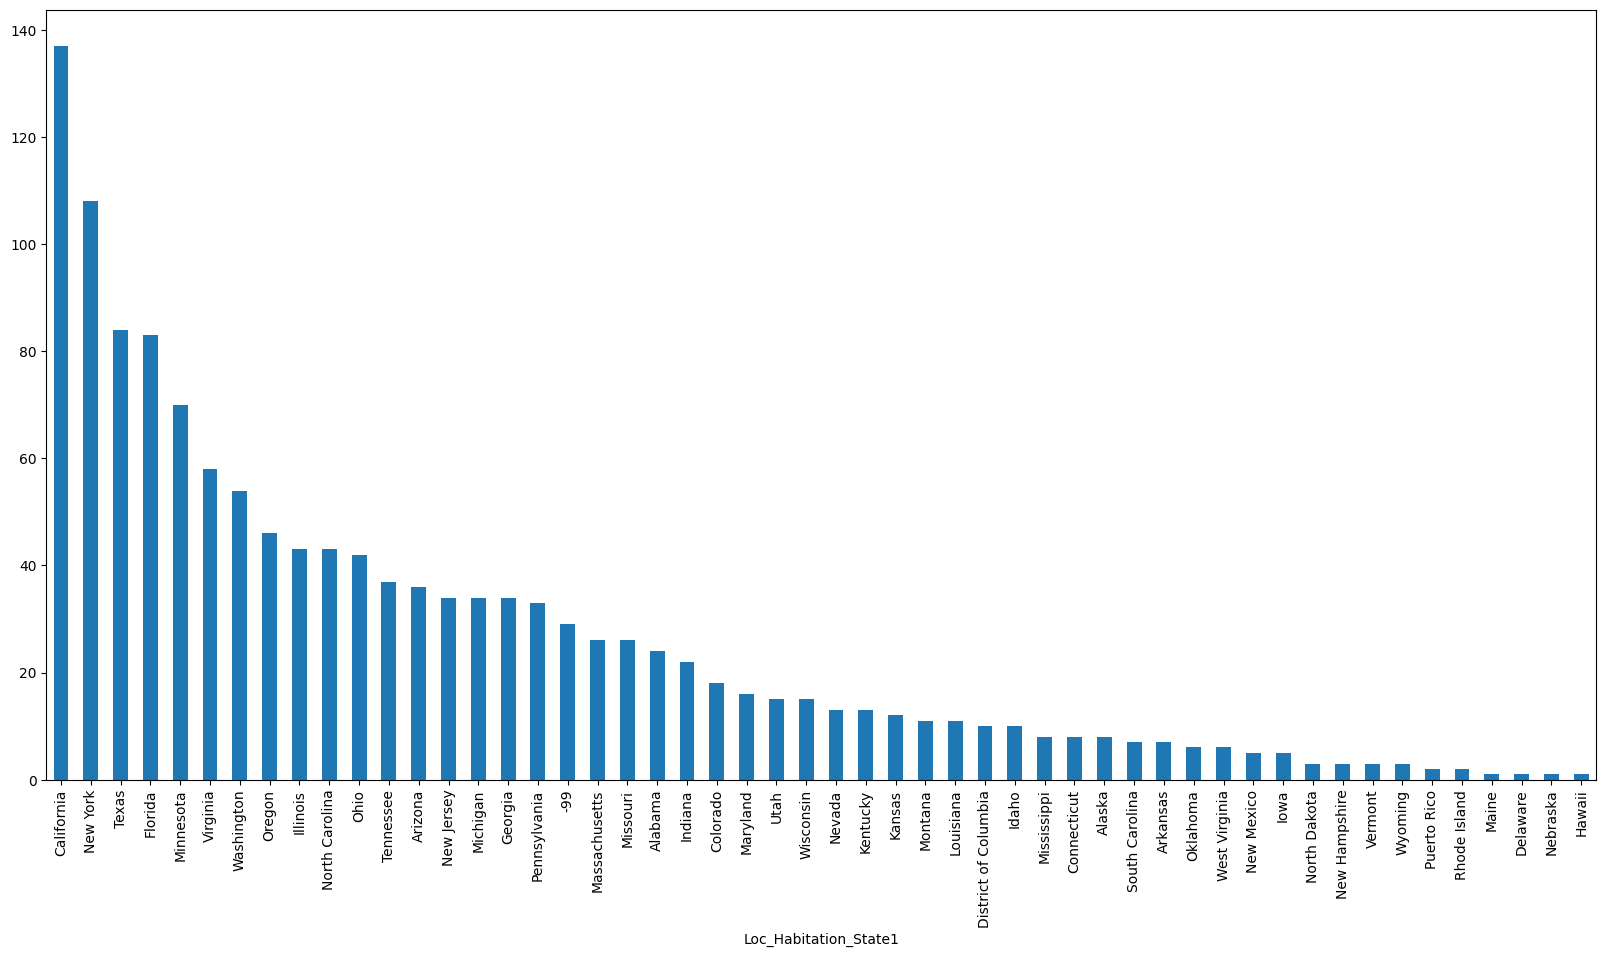

In [96]:
#Date_Exposure is not comparable because it is of dtype string.
#Create column 'Year' of int values that represents the last 2 digit of the year.
l = []
for val in pirus_temp['Date_Exposure']:
  a = val.split('/')
  b = a[-1:]
  l.append(int(b[0]))
pirus_temp['Year'] = l
#Any row with 'Year' under 22 occured in the 2000's and is in the scope of this study
pirus_temp = pirus_temp[pirus_temp['Year'] <= 22]
#Group by state
pirus_states_since_2000 = pirus_temp.value_counts('Loc_Habitation_State1')
pirus_states_since_2000.plot(kind='bar', figsize=(20, 10))

<h2>Protests in the United States</h2><p>This data set is collected on the event level. Because we are examining trends on the state level, we will save this Data grouped to the protest event location. It is worth noting that popular protest often spreads. This data is harvested by webcrawling for news articles and similar media referencing the protest to a location. Therefore, protests that happened in wave, such as those in response to George Floyd's murder, will appearch multiple times. However, we will still count these as separate events, even if such events are comorbid.</p><p>Because this data set only covers 4 years, we do not have to filter it. We will only group it by state.</p>

In [97]:
protests_temp = pd.read_csv("./Protests/data.csv",
                         header = 1,
                         names = ['Date','Location','Attendees',
                         'Event (legacy; see tags)','Tags',
                         'Curated','Source','Total_Articles'])
protests_temp.head(20)

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total_Articles
0,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
1,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
2,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
3,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1
4,2017-01-19,"Washington, DC",NaN,Executive,Executive; Against 45th president,Yes,https://malvern-online.com/content/melee-near-...,1
5,2017-01-19,"Washington, DC",NaN,Executive,Executive; For 45th president; Counter protest,No,https://malvern-online.com/content/melee-near-...,1
6,2017-01-20,"University of Washington, Seattle, WA",NaN,Racial Injustice,Civil Rights; For racial justice; Against invi...,Yes,http://komonews.com/news/local/woman-says-she-...,2
7,2017-01-20,"Westlake Park, Seattle, WA",100.0,Executive,Executive; Against 45th president,Yes,https://www.seattletimes.com/seattle-news/nort...,1
8,2017-01-20,"Columbus, OH",2450.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,http://www.cleveland.com/politics/index.ssf/20...,1
9,2017-01-20,"Anacortes, WA",1200.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,http://www.goskagit.com/skagit/hundreds-partic...,1


In [98]:
#Must create state attribute to groupby state, similar to extracting year, but first create dictionary matching statges to abbreviation.
states = [
"Alabama",
"Alaska",
"Arizona",
"Arkansas",
"California",
"Colorado",
"Connecticut",
"District of Columbia",
"Delaware",
"Florida",
"Georgia",
"Guam",
"Hawaii",
"Idaho",
"Illinois",
"Indiana",
"Iowa",
"Kansas",
"Kentucky",
"Louisiana",
"Maine",
"Maryland",
"Massachusetts",
"Michigan",
"Minnesota",
"Mississippi",
"Missouri",
"Montana",
"Nebraska",
"Nevada",
"New Hampshire",
"New Jersey",
"New Mexico",
"New York",
"North Carolina",
"North Dakota",
"Ohio",
"Oklahoma",
"Oregon",
"Pennsylvania",
"Puerto Rico",
"Rhode Island",
"South Carolina",
"South Dakota",
"Tennessee",
"Texas",
"United States",
"Utah", 
"Vermont",
"Virginia",
"Washington",
"West Virginia",
"Wisconsin",
"Wyoming"]
abbrev = ["AL",
"AK",
"AZ",
"AR",
"CA",
"CO",
"CT",
"DC",
"DE",
"FL",
"GA",
"GU",
"HI",
"ID",
"IL",
"IN",
"IA",
"KS",
"KY",
"LA",
"ME",
"MD",
"MA",
"MI",
"MN",
"MS",
"MO",
"MT",
"NE",
"NV",
"NH",
"NJ",
"NM",
"NY",
"NC",
"ND",
"OH",
"OK",
"OR",
"PA",
"PR",
"RI",
"SC",
"SD",
"TN",
"TX",
"US",
"UT",
"VT",
"VA",
"WA",
"WV",
"WI",
"WY"]
states_dict = {}
i = 0
for name in abbrev:
  states_dict[name] = states[i]
  i += 1
print(states_dict)
#create list of state names
protests_temp


{'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'US': 'United States', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total_Articles
0,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
1,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
2,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
3,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1
4,2017-01-19,"Washington, DC",NaN,Executive,Executive; Against 45th president,Yes,https://malvern-online.com/content/melee-near-...,1
...,...,...,...,...,...,...,...,...
38091,2021-01-30,"Washington Square, Ottawa, IL",100.0,Legislative,Legislative; Against congressional representat...,No,https://www.shawlocal.com/mywebtimes/news/loca...,1
38092,2021-01-31,"Topeka, KS",NaN,Civil Rights,Civil Rights; For abortion rights,Yes,https://www.kake.com/story/43266152/kansans-ra...,2
38093,2021-01-31,"Austin, TX",20.0,Other,Other; Against homeless residents,No,https://www.kxan.com/news/local/save-our-commu...,1
38094,2021-01-31,"Salt Lake City, UT",NaN,Other,Other; Against deregulation; Business,No,https://www.abc4.com/news/local-news/crowds-ga...,1


In [99]:
#Create a list that can be added as a column to the DataFrame, representing the locatiion the protest took place in.
l = []
for val in protests_temp['Location']:
  m = val.split(',')
  if len(m) >= 2:
    n = m[-1][-2:]
    state = states_dict[n.upper()]
    l.append(state)
  else: #accounting for abnormal cases. implementation based on printing individual cases
    if m == 'La Porte County Courthouse in La Porte':
      l.append('Indiana')
    if m == 'Space':
      l.append('New York')
    if n == 'WA':
      l.append('Washington')
    if n == 'DE':
      l.append('Delaware')
protests_temp['State'] = l
protests_temp

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total_Articles,State
0,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4,Tennessee
1,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1,Indiana
2,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1,Ohio
3,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1,Connecticut
4,2017-01-19,"Washington, DC",NaN,Executive,Executive; Against 45th president,Yes,https://malvern-online.com/content/melee-near-...,1,District of Columbia
...,...,...,...,...,...,...,...,...,...
38091,2021-01-30,"Washington Square, Ottawa, IL",100.0,Legislative,Legislative; Against congressional representat...,No,https://www.shawlocal.com/mywebtimes/news/loca...,1,Illinois
38092,2021-01-31,"Topeka, KS",NaN,Civil Rights,Civil Rights; For abortion rights,Yes,https://www.kake.com/story/43266152/kansans-ra...,2,Kansas
38093,2021-01-31,"Austin, TX",20.0,Other,Other; Against homeless residents,No,https://www.kxan.com/news/local/save-our-commu...,1,Texas
38094,2021-01-31,"Salt Lake City, UT",NaN,Other,Other; Against deregulation; Business,No,https://www.abc4.com/news/local-news/crowds-ga...,1,Utah


<AxesSubplot:ylabel='State'>

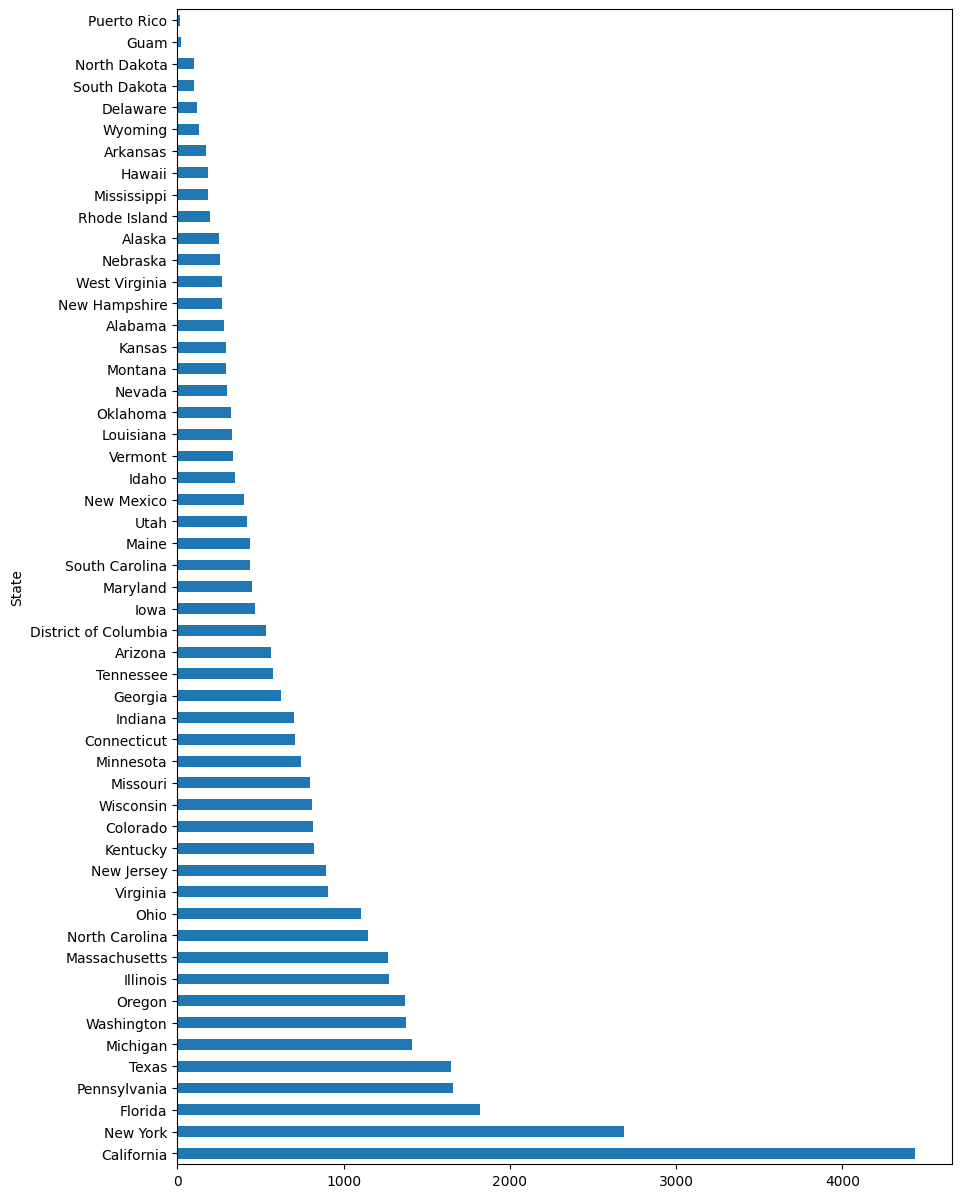

In [100]:
protests_by_state = protests_temp.value_counts('State')
protests_by_state.plot.barh(figsize=(10,15))

<p>From this bar chart, we can see that California has the highest number of protests. California also had the highest number of radicalized individuals.</p>

In [101]:
protests_by_state.mean()

718.7924528301887

We can also see that the mean number of protests by state is 718. 

<h1>Population Data</h1>
Source: Census Bureau. 
Notes: The years 2020 and 2021 were in different files, so had to join them.

In [102]:
pop20_21 = pd.read_csv('./Population/2020-2021 Census Bureau Population.csv')
#Rename columns due to header reading error
pop20_21.rename(columns={'Population Estimate\n (as of July 1)':'2020','Unnamed: 3':'2021'},inplace=True)
#Drop the first 6 rows becausethey are aggregates
pop20_21 = pop20_21.iloc[6:]
list1 = []
for i in pop20_21['Geographic Area']:
  i = i[1:]
  list1.append(i)
pop20_21['Geographic Area'] = list1
pop20_21.head()

,Geographic Area,"April 1, 2020 Estimates Base",2020,2021
6,Alabama,5024279.0,5024803.0,5039877.0
7,Alaska,733391.0,732441.0,732673.0
8,Arizona,7151502.0,7177986.0,7276316.0
9,Arkansas,3011524.0,3012232.0,3025891.0
10,California,39538223.0,39499738.0,39237836.0


In [103]:
pop10_19 = pd.read_csv('./Population/nst-est2019-01.csv')
#Rename columns due to header reading error
pop10_19.rename(columns={'Population Estimate (as of July 1)':'2010','Unnamed: 2':'Estimates Base','Unnamed: 4':'2011','Unnamed: 5':'2012','Unnamed: 5':'2012','Unnamed: 6':'2013','Unnamed: 7':'2014','Unnamed: 8':'2015','Unnamed: 9':'2016','Unnamed: 10':'2017','Unnamed: 11':'2018','Unnamed: 12': '2019'},inplace=True)
#Drop the first 6 rows becausethey are aggregates
pop10_19 = pop10_19.iloc[6:]
list1 = []
for i in pop10_19['Geographic Area']:
  i = i[1:]
  list1.append(i)
pop10_19['Geographic Area'] = list1
pop10_19.head()

,Geographic Area,"April 1, 2010",Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,Alabama,4779736.00,4780125.00,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
7,Alaska,710231.00,710249.00,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
8,Arizona,6392017.00,6392288.00,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
9,Arkansas,2915918.00,2916031.00,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
10,California,37253956.00,37254519.00,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [104]:
total_population = pop10_19
total_population['2020'] = pop20_21['2020']
total_population['2021'] = pop20_21['2021']
total_population.drop(['April 1, 2010','Estimates Base'],inplace=True,axis=1)

In [105]:
total_population.columns

Index(['Geographic Area', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [106]:
def fuck_around_and_find_out(row):
  ret_val = pd.DataFrame()
  ret_val['Population'] = list(row)[1:]
  ret_val['Year'] = total_population.columns[1:]
  return ret_val

S_pop = {}
for index, row in total_population.iterrows():
  S_pop[list(row)[0]] = fuck_around_and_find_out(row)


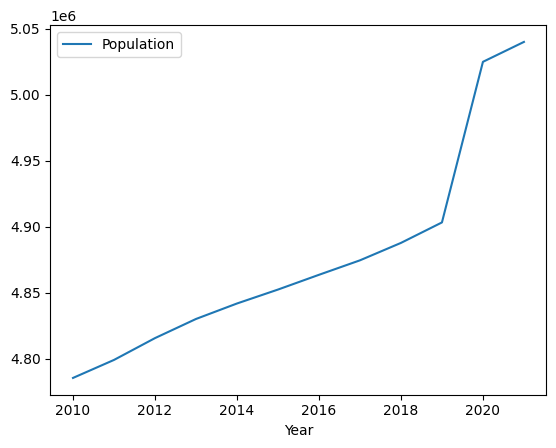

In [107]:
ax=S_pop['Alabama'].plot(x='Year',y='Population')

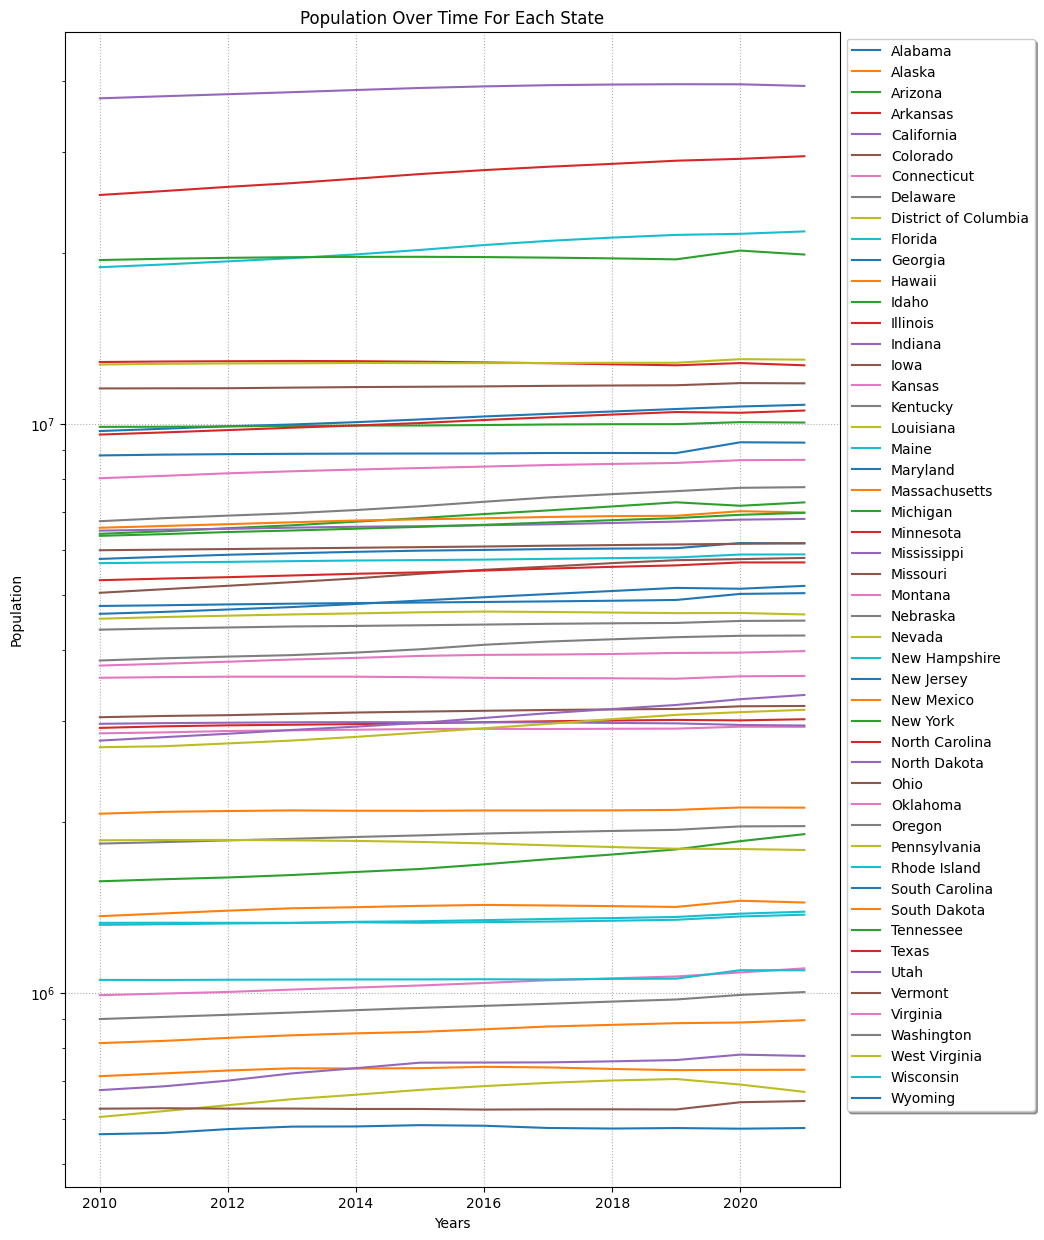

In [108]:
import matplotlib.pyplot as plt
# for key in S_pop.keys():
#   S_pop[key].plot(x='Year',y='Population')
# # S_pop.plot(x='Year',y='Population')
total_population.set_index('Geographic Area').transpose().plot(figsize=(10,15))
plt.yscale("log")
plt.legend(bbox_to_anchor=(1., 1.0), fancybox=True, shadow=True, ncol=1)
plt.xlabel("Years")
plt.ylabel("Population")
plt.title("Population Over Time For Each State")
plt.grid(linestyle=':')






In [109]:
pd.pivot_table(total_population, index='Geographic Area').head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Geographic Area,,,,,,,,,,,,
Alabama,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0,5024803.0,5039877.0
Alaska,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0,732441.0,732673.0
Arizona,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0,7177986.0,7276316.0
Arkansas,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0,3012232.0,3025891.0
California,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0,39499738.0,39237836.0


<h1>Merging Data</h1><p>Both protest and radicalization measure resistance to social or governmental structures. Therefore, it makes sense to joing aspects of the data into a very simple table to compare radicalization and protest activity. We will not merge this data on the 'State' attribute, because both datasets have such a large number of variables that the table produced would be unweildy.</p>

In [110]:
resistance_data = pd.DataFrame()
resistance_data['Radicalized_num'] = pirus_states_since_2000
resistance_data['Protest_num'] = protests_by_state
resistance_data.head()

,Radicalized_num,Protest_num
Loc_Habitation_State1,,
California,137,4439.0
New York,108,2688.0
Texas,84,1649.0
Florida,83,1823.0
Minnesota,70,747.0


<p>We can look at the relationship now between the number of protests in a state and the number of radicalized individuals in a state. Unsurprisingly, there is a visually obvious correlation. 

<AxesSubplot:xlabel='Number of Protests', ylabel='Number of People Radicalized'>

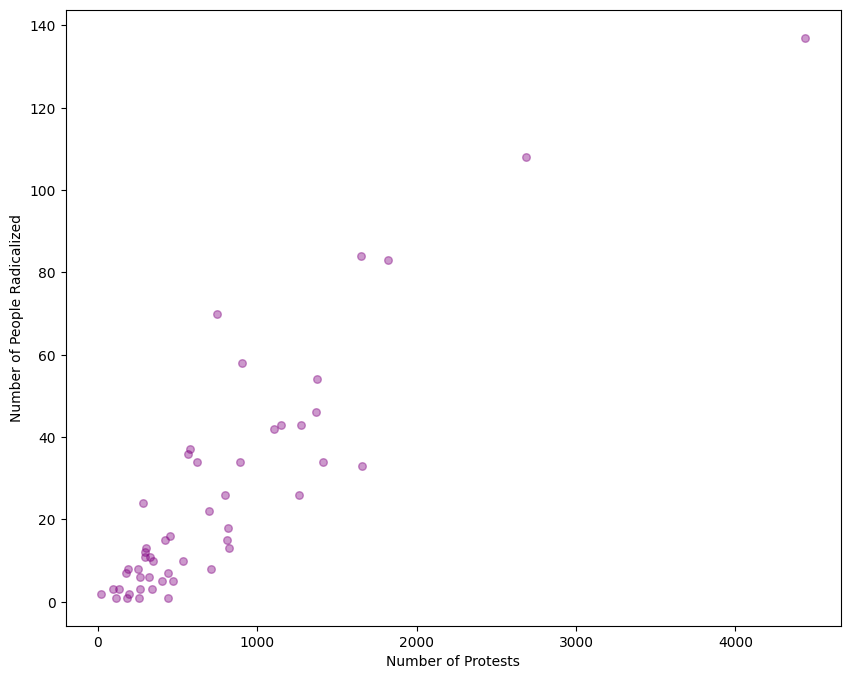

In [111]:
resistance_data.rename({'Loc_Habitation_State1':'State'},inplace=True)
resistance_data.plot(kind='scatter',
                     y='Radicalized_num',
                     x='Protest_num',
                     ylabel = "Number of People Radicalized",
                     xlabel = "Number of Protests",
                     figsize=(10,8),
                     alpha=0.4,
                     color='purple',
                     s=30)

<p>We can compute the correlation between these two variables as follows:</p>

In [112]:
resistance_data['Protest_num'].corr(resistance_data['Radicalized_num'])

0.8996117793328046

<p>This is a significant, but unsurprising 
correlation. We can represent the population size of the state through the dot size. </p>

In [129]:
resistance_data_merged = resistance_data.reset_index().rename(columns={'Loc_Habitation_State1':'State'}).merge(total_population.rename(columns={'Geographic Area':'State',"2021":"Population"})[["State","Population"]],on='State', how="right").set_index("State")
resistance_data_merged.head()
#len(resistance_data_merged)

51

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

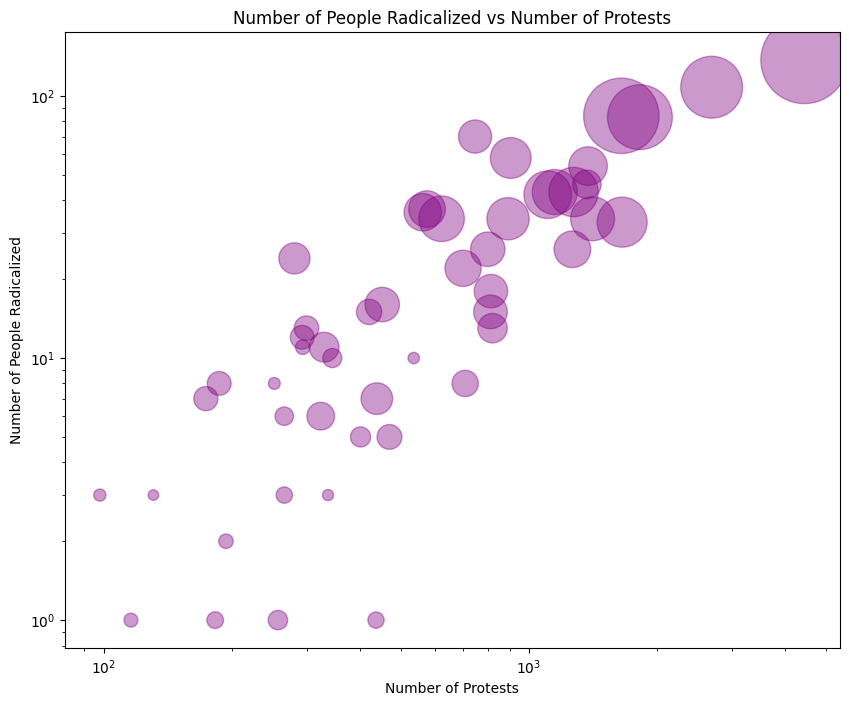

In [197]:
import math
resistance_data_merged.plot(kind='scatter',
                     y='Radicalized_num',
                     x='Protest_num',
                     ylabel = "Number of People Radicalized",
                     xlabel = "Number of Protests",
                     title="Number of People Radicalized vs Number of Protests",
                     figsize=(10,8),
                     alpha=0.4,
                     color='purple',
                     #s = resistance_data_merged['Population']
                     s=resistance_data_merged["Population"].apply({lambda x: x/1e4}))
plt.xscale("log")
plt.yscale("log")
x_vals = 
plt.text(x=resistance_data_merged.reset_index()["Protest_num"], y=resistance_data_merged.reset_index()["Radicalized_num"], s=resistance_data_merged.reset_index()["State"])

<h1>Models</h1>

In [190]:
count = []
final = []
for tag in protests_temp['Tags']:
    temp = tag.split(';')
    count.append(len(temp))
    final += temp
final = pd.unique(final)
print(pd.unique(count))

[3 2 4 6 7 5 8]


<h1>Project Strategy</h1><p>Beyond looking at the aggregate state data, the team will look at relationships between political participation, resistance, and violence over time by year for each state. Additionally, if time permits, the group will look at factors such as party affiliation and interest group affiliation.</p>